## XGBoost to predict formula one 

In [2]:
from xgboost import XGBClassifier, DMatrix
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
to_remove = ['trend_wehrlein', 'trend_zhou', 'alfa_romeo', 'alphatauri',
       'aston_martin', 'caterham', 'trend_french_grand_prix',
       'trend_vandoorne', 'lotus_f1', 'manor_marussia', 'marussia',
       'sakhir_grand_prix', 'racing_point', 'rb_f1_team', 'renault',
       'trend_vergne', 'trend_sutil', 'trend_tsunoda', 'toro_rosso',
       'trend_magnussen', 'trend_maldonado', 'trend_massa',
       'trend_mazepin', 'trend_nasr', 'trend_palmer', 'trend_piastri',
       'trend_70th_anniversary_grand_prix', 'tuscan_grand_prix',
       'trend_rossi', 'turkish_grand_prix', 'são_paulo_grand_prix',
       'styrian_grand_prix', 'trend_german_grand_prix',
       'trend_schumacher', 'trend_sirotkin', 'trend_stroll', 'sauber',
       'trend_alphatauri', 'trend_alfa_romeo', 'driver_rank_16',
       'european_grand_prix', 'emilia_romagna_grand_prix',
       'eifel_grand_prix', 'dutch_grand_prix', 'constructor_rank_10',
       'constructor_rank_11', 'driver_rank_11', 'driver_rank_15',
       'driver_rank_17', 'trend_latifi', 'driver_rank_18',
       'driver_rank_19', 'driver_rank_20', 'driver_rank_21',
       'driver_rank_22', 'driver_rank_23', 'driver_rank_24',
       '70th_anniversary_grand_prix', 'start_position_22',
       'start_position_21', 'start_position_20', 'french_grand_prix',
       'trend_caterham', 'qatar_grand_prix', 'portuguese_grand_prix',
       'trend_lotus_f1', 'trend_manor_marussia', 'trend_marussia',
       'miami_grand_prix', 'trend_racing_point', 'trend_rb_f1_team',
       'mexico_city_grand_prix', 'trend_sauber', 'mexican_grand_prix',
       'malaysian_grand_prix', 'las_vegas_grand_prix',
       'start_position_17', 'german_grand_prix', 'start_position_19',
       'trend_lawson', 'trend_sargeant', 'trend_kvyat', 'kubica',
       'de_vries', 'ericsson', 'gasly', 'giovinazzi', 'grosjean',
       'gutiérrez', 'hartley', 'kobayashi', 'kvyat', 'piastri', 'latifi',
       'lawson', 'magnussen', 'maldonado', 'massa', 'mazepin', 'nasr',
       'ocon', 'chilton', 'button', 'trend_eifel_grand_prix', 'bianchi',
       'trend_las_vegas_grand_prix', 'trend_malaysian_grand_prix',
       'trend_mexican_grand_prix', 'trend_mexico_city_grand_prix',
       'trend_miami_grand_prix', 'trend_portuguese_grand_prix',
       'trend_qatar_grand_prix', 'trend_sakhir_grand_prix',
       'trend_saudi_arabian_grand_prix', 'trend_spanish_grand_prix',
       'trend_styrian_grand_prix', 'trend_são_paulo_grand_prix',
       'trend_turkish_grand_prix', 'trend_tuscan_grand_prix',
       'trend_united_states_grand_prix', 'trend_european_grand_prix',
       'trend_emilia_romagna_grand_prix', 'palmer',
       'trend_dutch_grand_prix', 'trend_button',
       'trend_austrian_grand_prix', 'sutil', 'trend_hartley', 'tsunoda',
       'vandoorne', 'wehrlein', 'zhou', 'trend_bianchi', 'sirotkin',
       'trend_chilton', 'trend_de_vries', 'trend_ericsson',
       'trend_gutiérrez', 'trend_giovinazzi', 'trend_grosjean', 'stroll',
       'vergne', 'schumacher', 'trend_kobayashi', 'rossi', 'trend_kubica',
       'sargeant', "time", "end_position"]

In [4]:
data = pd.read_excel("model_df.xlsx", index_col = 0)

y = data["end_position"].apply(lambda x: 6 if x > 5 else x).values - 1
X = data.drop(to_remove, axis = 1).copy()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Perceiving problem as multiclass

In [ ]:
{'colsample_bytree': 0.17006796606750607,
 'gamma': 0.645988300316358,
 'learning_rate': 0.07515303815153107,
 'max_depth': 13.0,
 'min_child_weight': 6.0,
 'n_estimators': 650.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.4137808781745424}

In [65]:
params = {
    'gamma': 0.645988300316358,
    'max_depth': 13,
    'min_child_weight': 6,
    'reg_alpha': 3,
    'reg_lambda': 0.4137808781745424,
    'objective': 'multi:softmax',
    'num_class': 6,
    'tree_method': 'hist',
    'learning_rate':  0.07515303815153107,
    'n_estimators': 650,
    'subsample': 0.8,
    'colsample_bytree': 0.17006796606750607,
    'seed' : 123}

model = XGBClassifier(**params)

In [66]:
# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.17006796606750607, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.645988300316358,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07515303815153107,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=650, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [67]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


In [68]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        37
           1       0.34      0.26      0.30        46
           2       0.29      0.32      0.30        38
           3       0.21      0.15      0.18        40
           4       0.00      0.00      0.00        39
           5       0.77      0.93      0.84       232

    accuracy                           0.62       432
   macro avg       0.35      0.38      0.36       432
weighted avg       0.54      0.62      0.57       432



In [69]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

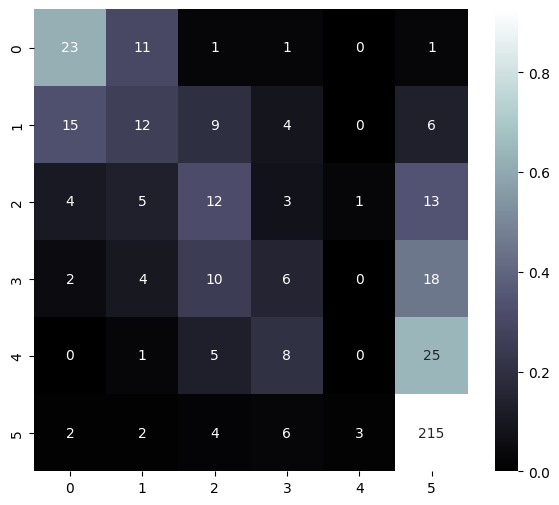

In [70]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = [0,1,2,3,4,5])

In [71]:
# Calculate accuracy
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(mse)

# print(y_pred_proba, y_test)

Accuracy: 62.04%
1.5115740740740742


In [72]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(
    model, X_test, y_test, scoring='neg_log_loss', n_repeats=10, random_state=42
)

# Get the feature importances and sort them in descending order
feature_importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)


In [118]:
feature_importances_2 = feature_importances.reset_index()
feature_importances_2

,index,0
0,start_position_1,0.047936
1,start_position_2,0.038967
2,start_position_3,0.036799
3,start_position_4,0.026445
4,driver_rp_rel_std,0.019598
...,...,...
125,constructor_rank_4,-0.001800
126,austrian_grand_prix,-0.002454
127,raceId,-0.005582
128,avg_season_pit_stop_duration,-0.006854


In [119]:
feature_importances.to_excel("features2.xlsx")

## Cross validataion

In [15]:
params_2 = {
    'gamma': 0.59,
    'max_depth': 15,
    'min_child_weight': 9,
    'reg_alpha': 0,
    'reg_lambda': 0.71,
    'objective': 'multi:softmax',
    'num_class': 6,
    'tree_method': 'hist',
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8}

In [239]:
# set(y)
np.unique(y)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [240]:
y_train.shape

(1725,)

In [247]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

In [252]:
y_pred = cross_val_predict(model, X_test, y_test, cv=cv)

In [253]:
mean_squared_error(y_test, y_pred)

2.1180555555555554

## Hypertune

In [1]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [25]:
space6 = {'max_depth': hp.quniform("max_depth", 10, 20, 1),
        'gamma': hp.uniform ('gamma', 0.01,0.8),
        'reg_alpha' : hp.quniform('reg_alpha', 0.01,3,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0.1,0.5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,1),
        'min_child_weight' : hp.quniform('min_child_weight', 3, 12, 1),
        'n_estimators' : hp.quniform('n_estimators', 500, 2000, 10),
        'learning_rate' : hp.uniform('learning_rate', 0.01, 0.1)}


In [26]:

def objective(space):
    clf = XGBClassifier(
                    n_estimators = int(space['n_estimators']),
                    max_depth=int(space['max_depth']), 
                    gamma=space['gamma'],
                    reg_alpha=int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=space['colsample_bytree'],  # Not cast to int
                    seed=123,
                    objective='multi:softmax',
                    num_class=6,
                    tree_method='hist',
                    learning_rate=space['learning_rate'],
                    subsample=0.8)

    clf.fit(X_train, y_train, verbose=False)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("SCORE:", mse)
    return {'loss': mse, 'status': STATUS_OK}


In [28]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space6,
                        algo = tpe.suggest,
                        max_evals = 2000,
                        trials = trials)

SCORE:                                                  
1.7662037037037037                                      
SCORE:                                                                              
1.7314814814814814                                                                  
SCORE:                                                                              
1.8194444444444444                                                                  
SCORE:                                                                              
1.7430555555555556                                                                  
SCORE:                                                                              
1.837962962962963                                                                   
SCORE:                                                                              
1.7592592592592593                                                                  
SCORE:                              

In [29]:
best_hyperparams

{'colsample_bytree': 0.17006796606750607,
 'gamma': 0.645988300316358,
 'learning_rate': 0.07515303815153107,
 'max_depth': 13.0,
 'min_child_weight': 6.0,
 'n_estimators': 650.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.4137808781745424}

## Prediction final

In [67]:
y_pred_proba = model.predict_proba(X)
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns = [0,1,2,3,4,5]) 


y_pred_proba_df["raceId"] = data["raceId"].values
y_pred_proba_df["end_position"] = data["end_position"].values
y_pred_proba_df.to_excel("final_data.xlsx")